In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# GRADIENT DESCENT

## The following functions are to compute the gradient descent algorithm

In [92]:
# compute the gradient--partial derivatives --put everything in a matrix
def part_diff(w1,w2):
    # Using basic definiton of differentiation:
    # limit delta_h tends to 0
    delta_h = 0.0000001
    partial_w1 = func(w1+delta_h,w2) - func(w1,w2)
    partial_w1 = partial_w1/delta_h
    partial_w2 = func(w1,w2+delta_h) - func(w1,w2)
    partial_w2 = partial_w2/delta_h
    differential_matrix = np.matrix([partial_w1,partial_w2]).transpose()
    return differential_matrix

# Define Function  
def func(w1,w2):
    equation = pow((pow(w1,2) + w2 -11),2) + pow((w1 + pow(w2,2) -7),2)
    return equation



# function to find tge minimum value
def algo(w0,differential_matrix,step_size):
    iter_value = 0
    while(np.linalg.norm(differential_matrix) >= pow(10,-12)):
        # declare failure if it cannot find iterations within 10000
        if iter_value >= 10000:
            return "Failure to compute gradient within 10000 iterations"
        w0 = w0 - np.multiply(step_size,differential_matrix)
        w1 = w0[0,0]
        w2 = w0[1,0]
        differential_matrix = part_diff(w1,w2)
        fro_norm = np.linalg.norm(differential_matrix)
        iter_value = iter_value + 1
    print("Minimum matrix ",w0.transpose())
    print("Iterations ",iter_value)
    minimum_mat = w0.transpose()
    return fro_norm,minimum_mat,iter_value


### 1. Initialize gradient descent from w0 = [0 -4]


In [93]:
#### Step size = 0.005
step_size = 0.005
w0 = np.matrix([0,-4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)

#### Step size = 0.01
step_size = 0.01
w0 = np.matrix([0,-4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)
## As the step size increases, the number of iterations decreases.

('Minimum matrix ', matrix([[-3.77931032, -3.28318606]]))
('Iterations ', 93)
8.146546881444098e-13
('Minimum matrix ', matrix([[-3.77931032, -3.28318606]]))
('Iterations ', 38)
4.0106542481405643e-13


### 2. Run gradient descent with step size γ = 0.01 for four different initializations:

In [94]:
# w0 = [0 -4]
step_size = 0.01
w0 = np.matrix([0,-4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat1,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)
print(minimum_mat1)
print("\n")

# w0 = [0.5 -4]
step_size = 0.01
w0 = np.matrix([0.5,-4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat2,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)
print(minimum_mat2)
print("\n")

# w0 = [0 4]
step_size = 0.01
w0 = np.matrix([0,4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat3,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)
print(minimum_mat3)
print("\n")

# w0 = [0.5 4]
step_size = 0.01
w0 = np.matrix([0.5,4]).transpose()
differential_matrix = part_diff(w0[0,0],w0[1,0])
minimum,minimum_mat4,iter_value = algo(w0,differential_matrix,step_size)
print(minimum)
print(minimum_mat4[0][0])
print("\n")

('Minimum matrix ', matrix([[-3.77931032, -3.28318606]]))
('Iterations ', 38)
4.0106542481405643e-13
[[-3.77931032 -3.28318606]]


('Minimum matrix ', matrix([[ 3.58442829, -1.84812657]]))
('Iterations ', 91)
8.154825395973067e-13
[[ 3.58442829 -1.84812657]]


('Minimum matrix ', matrix([[-2.80511814,  3.13131247]]))
('Iterations ', 41)
9.66254882381912e-13
[[-2.80511814  3.13131247]]


('Minimum matrix ', matrix([[2.99999996, 1.99999998]]))
('Iterations ', 111)
8.500594669436027e-13
[[2.99999996 1.99999998]]




#### The solutions are not the same. They represent local minima.

Generate a contour plot of f(w) over the region [−5, 5] × [−5, 5] using 100 contour lines and
overlay on this plot the four gradient descent solution paths corresponding to the four different
initializations.

Text(0.5,1,u'Contour Plot')

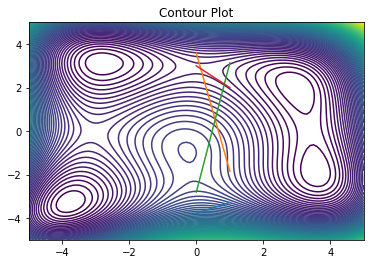

In [95]:
#Contour Plot
fig = plt.figure()
w1 = np.linspace(-5,5,101)
w2 = np.linspace(-5,5,101)
x,y = np.meshgrid(w1,w2)
contours = plt.contour(x,y,func(x,y),100)
plt.plot(np.transpose(minimum_mat1))
plt.plot(np.transpose(minimum_mat2))
plt.plot(np.transpose(minimum_mat3))
plt.plot(np.transpose(minimum_mat4))
plt.title('Contour Plot')

## Parameter Estimation
### N = 10**j j=1,....,6

In [96]:
mean_vector = np.array([-1,0,4,1,.5]).transpose()
covariance_matrix = 2*np.identity(5) # identity matrix

In [97]:
# Mean vector estimation for j=1 
error_list = []
n = []
for j in range(1,7):
    n1 = pow(10,j)
    n.append(n1)
    x = np.random.uniform(size=(n1,1))
    dist = multivariate_normal(mean=mean_vector, cov=covariance_matrix)
    samples = dist.rvs(size=(n1,1))
    new_mean_estimated = np.mean(samples, axis=0).transpose()


    difference = np.subtract(new_mean_estimated,mean_vector)
    error = np.square(np.linalg.norm(difference))
    error_list.append(error)
    print(j)
    print("Estimated mean vector is ",new_mean_estimated)
    print("Error ",error)
    print("\n")

print(error_list)
print(n)

1
('Estimated mean vector is ', array([-1.07462286, -0.07018521,  4.24150461,  0.33494487,  0.46179999]))
('Error ', 0.5125765715402096)


2
('Estimated mean vector is ', array([-0.94503163, -0.14727316,  3.88277011,  1.09063885,  0.36524923]))
('Error ', 0.06482692491764029)


3
('Estimated mean vector is ', array([-0.94359132,  0.02643713,  4.03762874,  1.06849473,  0.5107595 ]))
('Error ', 0.010104078074910854)


4
('Estimated mean vector is ', array([-1.00010983,  0.01567601,  3.9897567 ,  1.02592275,  0.49122951]))
('Error ', 0.001099584774985206)


5
('Estimated mean vector is ', array([-0.99752652, -0.00867949,  4.00347116,  0.99192481,  0.49578384]))
('Error ', 0.0001764853496816242)


6
('Estimated mean vector is ', array([-1.00038833e+00,  7.12703158e-04,  4.00238788e+00,  1.00000010e+00,
        4.99557413e-01]))
('Error ', 6.556580084693874e-06)


[0.5125765715402096, 0.06482692491764029, 0.010104078074910854, 0.001099584774985206, 0.0001764853496816242, 6.556580084693874e-

Text(0,0.5,u'e_N')

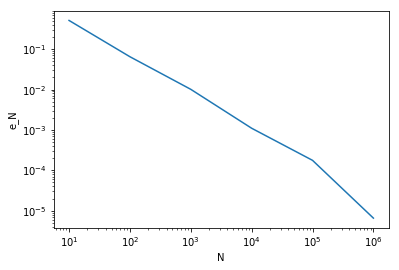

In [98]:
#Log-log plot
e_N = np.array(error_list)
N = np.array(n)
fig, ax = plt.subplots()
ax.loglog(N,e_N)
plt.xlabel('N')
plt.ylabel('e_N')

#N and eN are inversely related.